# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplcursors
import pandas as pd
from datetime import datetime
from datetime import timezone
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html,"html.parser")

In [5]:
# Extract table headers and rows of table data
tempdata = soup.find_all('table',class_='table')

for tdata in tempdata:
    temphead = tdata.find_all('th')
    tempdict= tdata.find_all('tr',class_='data-row')
    print('-----------------')
    print(temphead)
    print(tempdict[0])

-----------------
[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>]
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:

# Create an empty list
# Loop through the scraped data to create a list of column names
colnames = []
tempheaders = soup.find_all('table',class_='table')
for tr in tempheaders:
    th = tr.find_all('th')
    row = [tr.text for tr in th]
    colnames.append(row)
colnamesflat = [item for sublist in colnames for item in sublist]
colnamesflat


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [7]:
# Create an empty list
# Loop through the scraped data to create a list of rows

lrows = []
tempdata = soup.find_all('tr',class_='data-row')
for tr in tempdata:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    lrows.append(row)

print(lrows[0])



['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']


In [8]:
# close out browser
browser.quit()

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Confirm DataFrame was created successfully
mdf= pd.DataFrame(lrows,columns = colnamesflat)
mdf

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mdf.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mdf['sol'] = mdf['sol'].astype('int') 
mdf['ls'] = mdf['ls'].astype('int')
mdf['month'] = mdf['month'].astype('int')

In [12]:
# Change data types for data analysis
mdf['min_temp'] = mdf['min_temp'].astype('float')
mdf['pressure'] = mdf['pressure'].astype('float')

In [13]:
# Change data types for data analysis
# add Date column to support calculating the number of earth days in a martian year - supplement to Data Analysis #5
mdf.terrestrial_date = pd.to_datetime(mdf.terrestrial_date)
mdf['Date']=mdf['terrestrial_date'].dt.date



In [14]:
# Confirm type changes were successful by examining data types again
mdf.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
Date                        object
dtype: object

In [15]:
# check dataframe
mdf

,id,terrestrial_date,sol,ls,month,min_temp,pressure,Date
0,2,2012-08-16,10,155,6,-75.0,739.0,2012-08-16
1,13,2012-08-17,11,156,6,-76.0,740.0,2012-08-17
2,24,2012-08-18,12,156,6,-76.0,741.0,2012-08-18
3,35,2012-08-19,13,157,6,-74.0,732.0,2012-08-19
4,46,2012-08-20,14,157,6,-74.0,740.0,2012-08-20
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2018-02-23
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018-02-24
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2018-02-25
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2018-02-26


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months exist on Mars?

nmonths = mdf.month.nunique()
print(f' There are {nmonths} months on Mars.')
print('----------------------')

monthcount = mdf.groupby('month')['min_temp'].count()
monthcount


 There are 12 months on Mars.
----------------------


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: min_temp, dtype: int64

In [17]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
#sol = number of elapsed sols (Martian days)since Curiosity landed on Mars

datasol = mdf.sol.nunique()
print(f" There are {datasol} Martian days' worth of data.")


 There are 1867 Martian days' worth of data.


In [18]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# find the average of the minimum daily temperature for all of the months
avlowt = mdf.groupby('month')['min_temp'].mean().reset_index()
avlowt

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


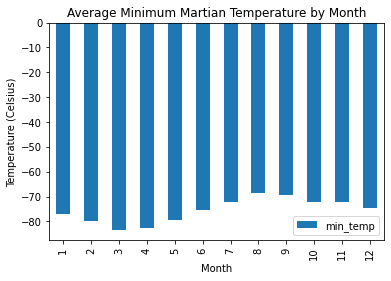

In [19]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Plot the average minimum daily temperature for all of the months as a bar chart
minmonthtemp = mdf.groupby('month')['min_temp'].mean().plot.bar(x='month', y='temp', legend = True, title = "Average Minimum Martian Temperature by Month")
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.savefig('Resources/MarsTemp.jpg', transparent = False )
plt.show()


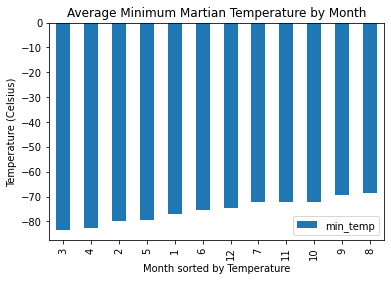

----------------------
 The coldest month is 3 with an average temperature of -83.31 degrees Celsius.
----------------------
 The warmest month is 8 with an average temperature of -68.38 degrees Celsius.
----------------------


In [20]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
# Plot the average minimum daily temperature for all of the months as a bar chart
minmonthtempsort = mdf.groupby('month')['min_temp'].mean().sort_values().plot.bar(x='month', y='temp', legend = True, title = "Average Minimum Martian Temperature by Month")
plt.xlabel('Month sorted by Temperature')
plt.ylabel('Temperature (Celsius)')
plt.savefig('Resources/MarsTempSort.jpg', transparent = False )
plt.show()

# Identify the coldest and warmest months in Curiosity's location
avtemp = mdf.groupby('month')['min_temp'].mean().sort_values().reset_index()
raspberry = len(avtemp.month)-1

print('----------------------')
print(f' The coldest month is {avtemp.month[0]} with an average temperature of {round(avtemp.min_temp[0],2)} degrees Celsius.')
print('----------------------')
print(f' The warmest month is {avtemp.month[raspberry]} with an average temperature of {round(avtemp.min_temp[raspberry],2)} degrees Celsius.')
print('----------------------')

In [21]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# Find the average daily atmospheric pressure of all the months
avpressure = mdf.groupby('month')['pressure'].mean().reset_index()
avpressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


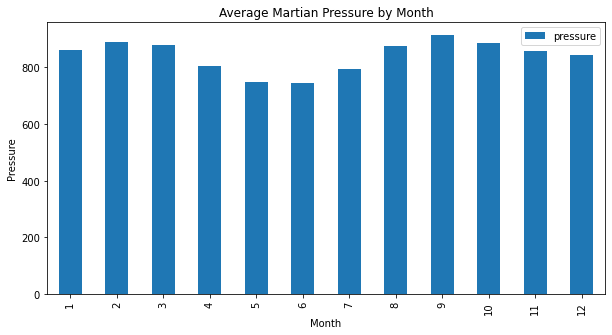

In [22]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# Plot the average daily atmospheric pressure by month as a bar chart
avpressplot = mdf.groupby('month')['pressure'].mean().plot.bar(x='month', y='pressure', legend = True,figsize=[10,5], title = "Average Martian Pressure by Month")
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.savefig('Resources/MarsPressure.jpg', transparent = False )
plt.show()

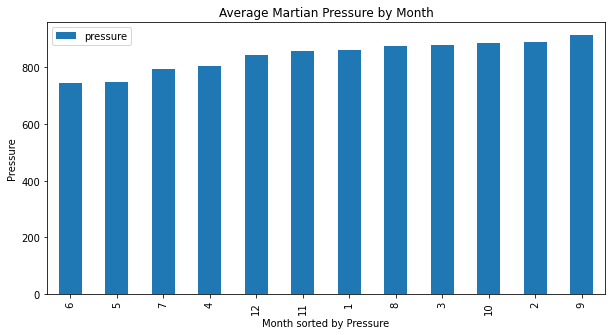

----------------------
 The month with the lowest average atmospheric pressure is 6 with an average pressure of 745.05.
----------------------
 The month with the highest average atmospheric pressure is 9 with an average pressure of 913.31.
----------------------


In [23]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars?
# Plot the sorted average daily atmospheric pressure by month as a bar chart
avpressplot = mdf.groupby('month')['pressure'].mean().sort_values().plot.bar(x='month', y='pressure', legend = True,figsize=[10,5], title = "Average Martian Pressure by Month")
plt.xlabel('Month sorted by Pressure')
plt.ylabel('Pressure')
plt.savefig('Resources/MarsPressureSort.jpg', transparent = False )
plt.show()

# Identify the lowest and highest average pressure months in Curiosity's location
avpress = mdf.groupby('month')['pressure'].mean().sort_values().reset_index()
plum= len(avpress.month)-1

print('----------------------')
print(f' The month with the lowest average atmospheric pressure is {avpress.month[0]} with an average pressure of {round(avpress.pressure[0],2)}.')
print('----------------------')
print(f' The month with the highest average atmospheric pressure is {avpress.month[plum]} with an average pressure of {round(avpress.pressure[11],2)}.')
print('----------------------')

In [24]:
maxsol = mdf['sol'].max()
xlim = round(mdf['sol'].max(),-3)+50
print(maxsol)
print(xlim)

1977
2050


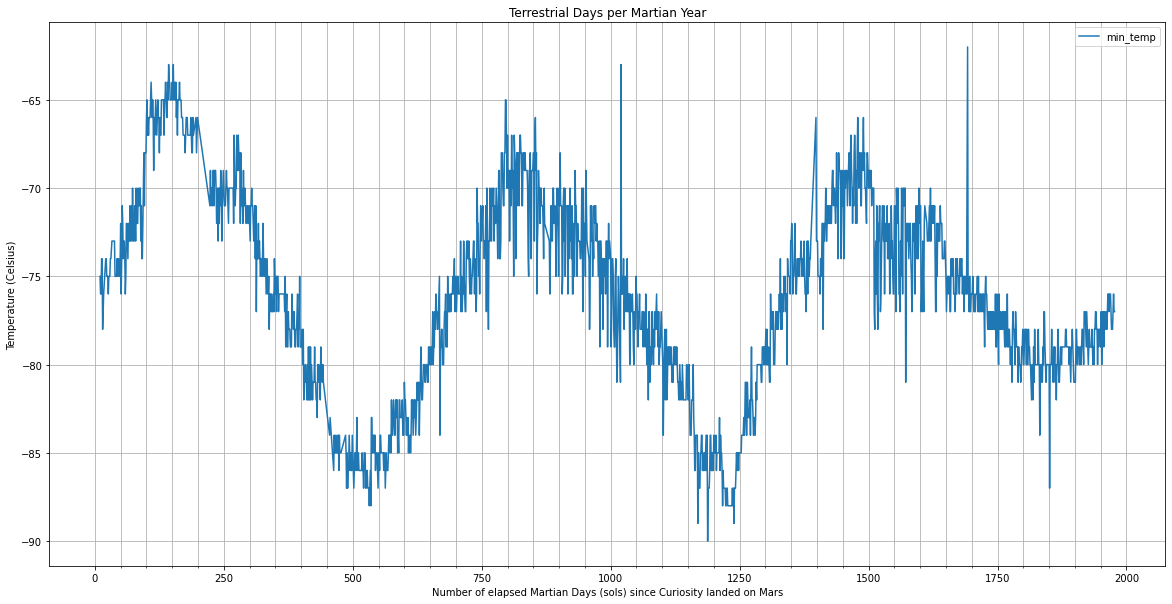

In [25]:
# 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
# 5a. Visually estimate the result by plotting the daily minimum temperature.


visdays = mdf.plot(x = 'sol',y = 'min_temp',legend = True, figsize=[20,10],title = "Terrestrial Days per Martian Year")
major_ticks = np.arange(0,xlim,250)
minor_ticks = np.arange(0,xlim,50)
visdays.set_xticks(major_ticks)
visdays.set_xticks(minor_ticks,minor = True)
visdays.grid(which = 'both')
plt.xlabel('Number of elapsed Martian Days (sols) since Curiosity landed on Mars')
plt.ylabel('Temperature (Celsius)')
plt.savefig('Resources/MYear_byTemp.jpg' )
plt.show()

#see additional analyses below regarding the number of terrestrial days in a Martian year.

Visual evaluation of the preceding chart:
The distance from peak to peak is roughly 1475-800, or 675 days. A year on Mars appears to be about 675 days from the plot.

Using matplotlib backend: <object object at 0x000001D8ECAD2B90>


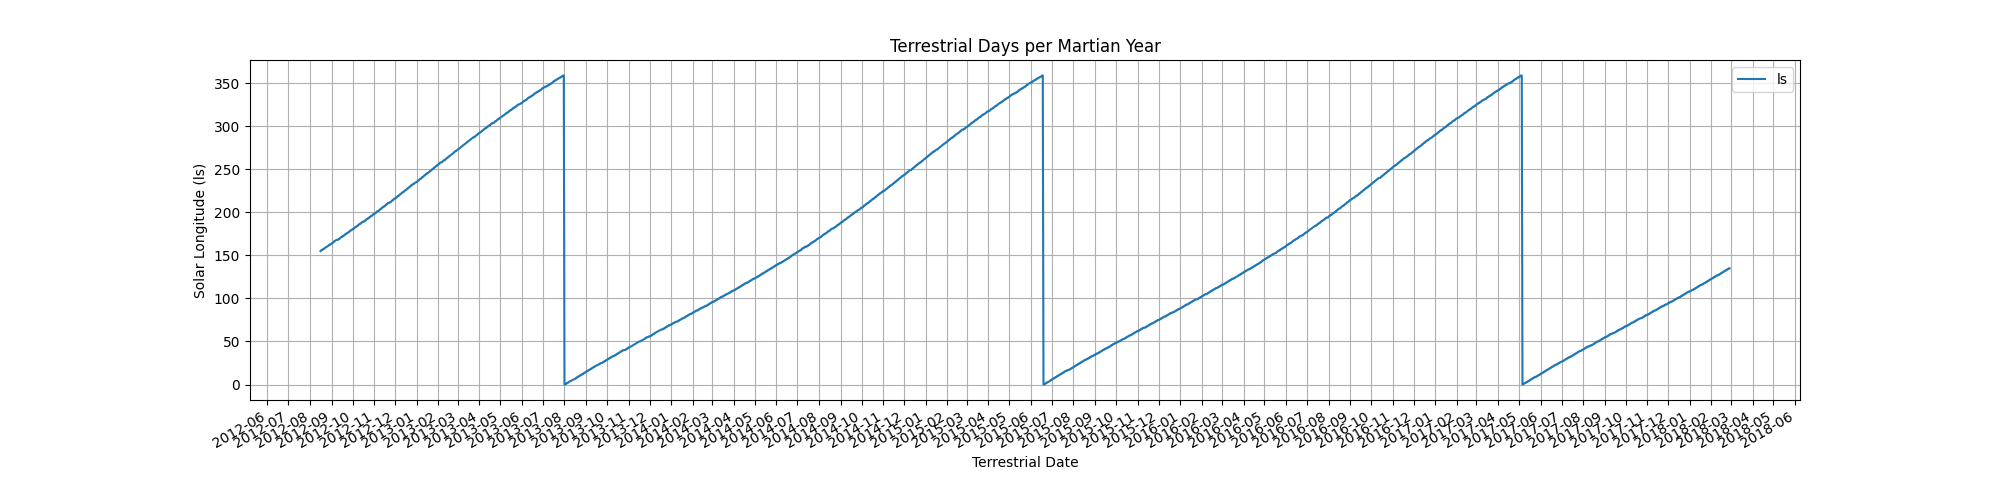

In [26]:
## 5. About how many terrestrial (Earth) days exist in a Martian year?
#  5b. visual estimation of number of earth days in a Martian year using solar longitude and terrestrial dates
## hover over the first vertical line to get the starting date for Curiosity's first full Martian year (8/01/2013)
## hover over the second vertical line to get the ending date for Curiosity's first full Martian year (6/18/2015)

%matplotlib
%matplotlib widget
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

lines = mdf.plot(x = 'terrestrial_date',y = 'ls',legend = True, figsize=[20,5],title = "Terrestrial Days per Martian Year" , )
# lines.xaxis.autofmt_xdate()
lines.grid(True)
lines.fmt_xdata = DateFormatter('%Y-%m-%d')
lines.xaxis.set_major_locator(mdates.MonthLocator())
mplcursors.cursor(lines,hover = True)
plt.xlabel('Terrestrial Date')
plt.ylabel('Solar Longitude (ls)')
plt.show()

In [27]:
# 5. About how many terrestrial (earth) days exist in a Martian year?  
# 5b. Calculate number of earth days in Martian year where solar longituge (ls) goes from 0 to 359 per solar orbit, i.e. year
# iterate through the dataframe to find the first and last days of Curiosity's first full year on Mars
#FDOYindex = first day of year index
#LDOYindex = last day of year index

prevls = 0

for index, row in mdf.iterrows():
    if row['ls'] == 0:
        FDOYindex = index
        break

for index, row in mdf.iterrows():
    if row['ls'] >= prevls:
        prevls=row['ls']
        LDOYindex = index
    if row['ls'] == 0 and index > FDOYindex+1:
        break

print(FDOYindex)
print(LDOYindex)
    

304
924


In [28]:
# 5. About how many terrestrial (earth) days exist in a Martian year?  
# 5b. Calculate number of earth days in Martian year where solar longituge (ls) goes from 0 to 359 per solar orbit, i.e. year
# to calculate days between dates
# https://pynative.com/python-difference-between-two-dates/#:~:text=Use%20the%20strptime(date_str%2C%20format,as%20per%20the%20corresponding%20format%20.&text=To%20get%20the%20difference%20between,result%20is%20a%20timedelta%20object.
#ls 0 to 359 signifies one Martian year
# 2015-06-18 terrestrial_date, sol = 1018, ls = 359, index = 924 (last measurement of 1st full Martian year for Curiosity) 2013-08-01 terrestrial_date, ls = 0, sol = 351, index = 304 (first measurement of 1st full Martian year for Curiosity)
# 687 days per google

floof = mdf['Date'][FDOYindex]
print(f"The first terrestrial_date of Curiosity's first full year on Mars is {floof}.")
poof = mdf['Date'][LDOYindex]
print(f"The last terrestrial_date of Curiosity's first full year on Mars is {poof}.")


# difference between dates in timedelta
delta = poof - floof
print(f'The difference is {delta.days} days.')
print(f'Total number of terrestrial days in a Martian year is {delta.days+1} days.')

The first terrestrial_date of Curiosity's first full year on Mars is 2013-08-01.
The last terrestrial_date of Curiosity's first full year on Mars is 2015-06-18.
The difference is 686 days.
Total number of terrestrial days in a Martian year is 687 days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
mdf.to_csv('Resources/MarsWeather.csv', index = False)
